In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth

ecdatabase = database.Database(file)
ecdatabase.create_anisotropic_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('wadsleyite')
model_names

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/publication correspondence/../pyrrhenious/database.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


['yk_12_wads',
 'sun_18_wads[001]',
 'sun_18_wads[010]',
 'sun_18_wads[100]',
 'y_08_wads',
 'isotropic_model:sun_18_wads[001]+sun_18_wads[010]+sun_18_wads[100]']

# Exploring Pyrrhenious's Wadsleyite Models Database Correspondence

Here we look at Wadsleyite models parameterization correspondence of:

 * Yoshino et al., 2008. Dry mantle transition zone inferred from the conductivity of wadsleyite and ringwoodite

 * Takashi Yoshino and Tomoo Katsura 2012. Re-evaluation of electrical conductivity of anhydrous and hydrous wadsleyite
  
 * Sun et al., 2018. Supercritical fluid in the mantle transition zone deduced from H–D interdiffusion of wadsleyite
 
In order to match the results of Yoshino and Katusra 2012, The small polaron conduction enthalpy had to be increased from 1.45 to 1.5, the water exponent in proton conduction was set to one, and the alpha value in the exponent had to be increased from 0.02 to 0.2

## Yoshino et al. 2008

(-7.0, 1.0)

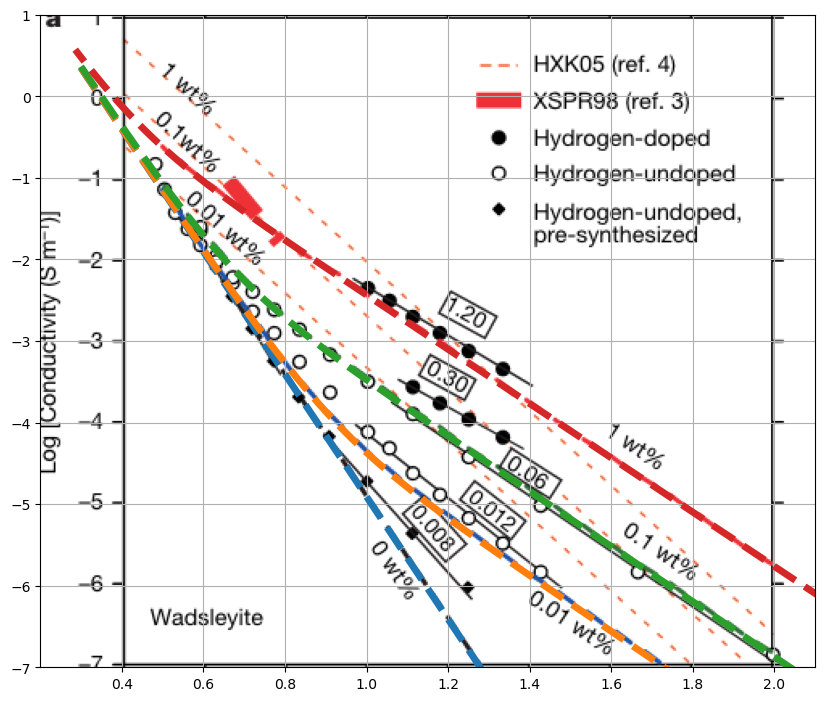

In [4]:
model = 'y_08_wads'
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min']-50,ec_model_row['temp_max']+1500,num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0,0.01,0.1,1]:
        conductivity = model.get_conductivity(T=temperature_range,Cw=water*1e4)
        ax.plot(1e3/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
        
plt.xlim([0.2,2.1])
plt.ylim([-7,1])


## Yoshino and Katsura 2012

(-7.0, 1.0)

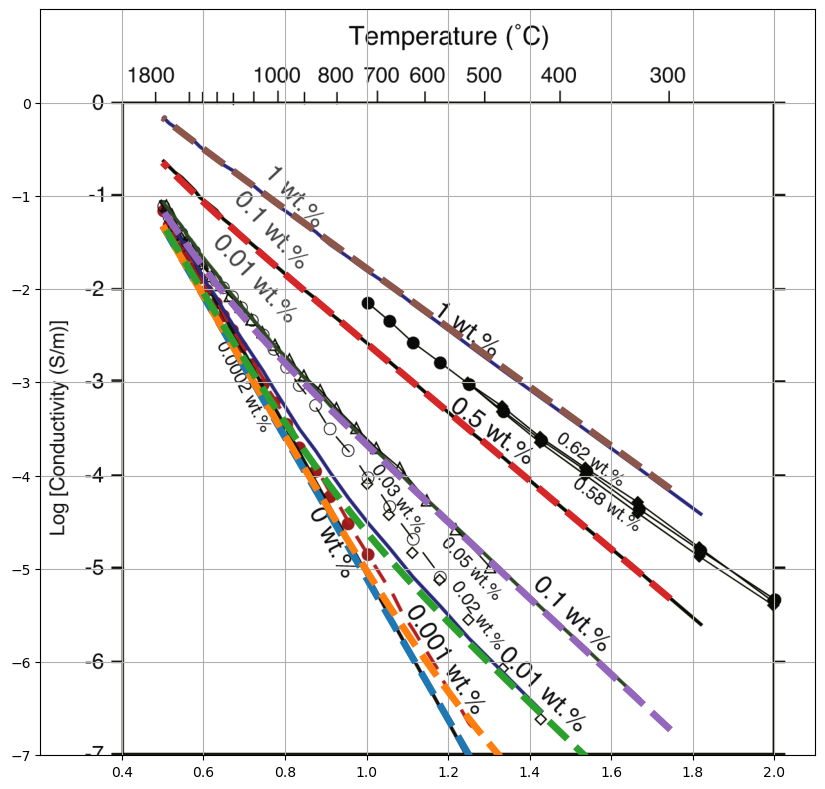

In [6]:
model = 'yk_12_wads'
ec_model_row = ecdatabase.get_model_properties('yk_12_wads')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(573,ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0,0.001,0.01,0.5,0.1,1]:
        conductivity = model.get_conductivity(T=temperature_range,Cw=water*1e4)
        ax.plot(1e3/temperature_range,np.log10(conductivity),linestyle='--',linewidth=5)
        
plt.xlim([0.2,2.1])
plt.ylim([-7,1])

## Sun et al., 2018

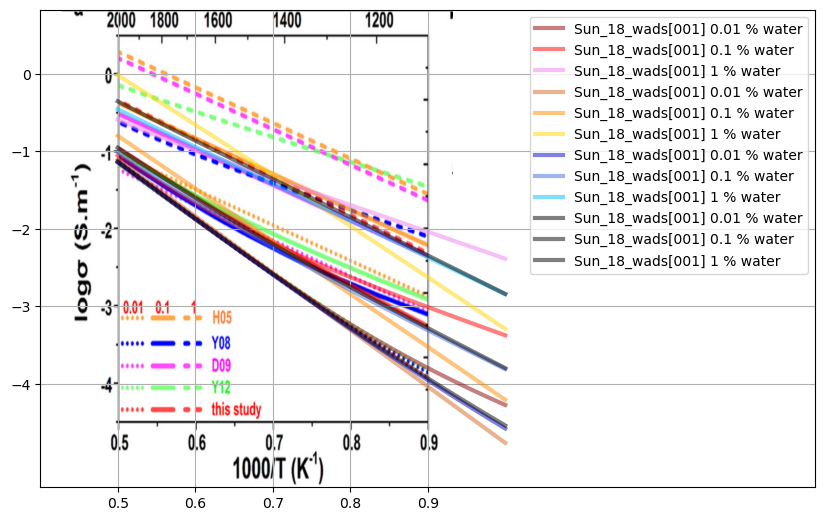

In [10]:
ec_model_row = ecdatabase.get_model_properties('sun_18_wads[001]')
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(1e3,1e3/0.5,num=100,dtype=float).ravel()
reds    = ['darkred','red','violet']
yellows = ['chocolate','darkorange','gold']
blues   = ['mediumblue','royalblue','deepskyblue']
greys   = ['black','black','black']
cmap = {'sun_18_wads[001]':reds,'sun_18_wads[010]':yellows,
                  'sun_18_wads[100]':blues,
        'isotropic_model:sun_18_wads[001]+sun_18_wads[010]+sun_18_wads[100]':greys}
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i!=2:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model_name, label in {'sun_18_wads[001]':'[001]','sun_18_wads[010]':'[010]',
                  'sun_18_wads[100]':'[100]',
    'isotropic_model:sun_18_wads[001]+sun_18_wads[010]+sun_18_wads[100]':'Geom Avg'}.items():
        ecmodel = ecdatabase.get_model(model_name)
        for i, water in enumerate([0.01,0.1,1]):
            if 'aniso' in model:
                linestyle=':'
                label=f'Geom avg {water} % water'
            else:
                linestyle='-'
                label=model+f' {water} % water'
            color = cmap[model_name][i]

            c1 = ecmodel.get_conductivity(T=temperature_range,Cw=water*1e4)
            ax.plot(1e3/temperature_range,np.log10(c1),linestyle=linestyle,
                    linewidth=3,alpha=0.5,color=color,label=label)
            
    plt.xlim([0.4,1.4])
    plt.legend(ncol=1)